In [3]:
from google.colab import drive
drive.mount('/content/data')

Mounted at /content/data


In [4]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

device_name = tf.test.gpu_device_name()

Found GPU at: /device:GPU:0


In [5]:
from tensorflow.keras.models import load_model
new_model = load_model('/content/data/MyDrive/cartoon_data/face_generator_2048.h5')

In [4]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4096)              8392704   
_________________________________________________________________
batch_normalization (BatchNo (None, 4096)              16384     
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 4096)              0         
_________________________________________________________________
reshape (Reshape)            (None, 4, 4, 256)         0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 8, 8, 256)         1638400   
_________________________________________________________________
batch_normalization_1 (Batch (None, 8, 8, 256)         1024      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 8, 8, 256)         0

In [5]:
#new_model.get_weights()

In [6]:
new_model.optimizer

In [7]:

import os, time

import numpy as np
from PIL import Image
from tqdm import tqdm
import matplotlib.pyplot as plt
from IPython import display

import tensorflow as tf
from tensorflow.keras.layers import Input, Reshape, Dropout, Dense 
from tensorflow.keras.layers import Flatten, BatchNormalization
from tensorflow.keras.layers import Activation, ZeroPadding2D
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import UpSampling2D, Conv2D, Conv2DTranspose, MaxPool2D
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.optimizers import Adam

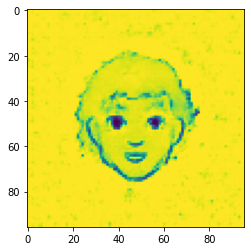

In [7]:

noise = tf.random.normal([1, 2048])
generated_image = new_model.predict(noise)
plt.imshow(generated_image[0, :, :, 0])

In [9]:
#We now have a GAN which generates Cartoon images


In [10]:
%cd "/content/data/MyDrive/"
%mkdir myfaces
!unzip -n -q /content/data/MyDrive/Aberdeen.zip -d /content/data/MyDrive/myfaces

/content/data/MyDrive
mkdir: cannot create directory ‘myfaces’: File exists


In [11]:
# Now need to have some model to make faces
#split train test
#using HOG detector for generating 100 features


(512, 464)
(512, 512)
(2048,)


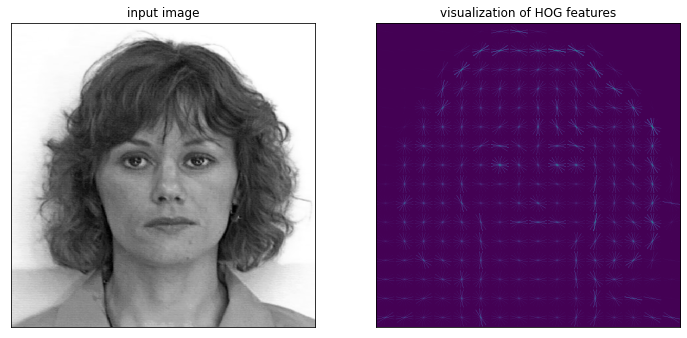

In [8]:
import cv2
from skimage import data, color, feature
import skimage.data
image_path = '/content/data/MyDrive/faces/alison2.jpg'
old_image = cv2.imread(image_path)
old_image = color.rgb2gray(old_image)
print(old_image.shape)
image = cv2.resize(old_image, (512, 512))
print(image.shape)
hog_vec, hog_vis = feature.hog(image, orientations=8, pixels_per_cell=(32, 32),
                    cells_per_block=(1, 1), visualize=True)

fig, ax = plt.subplots(1, 2, figsize=(12, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('input image')

ax[1].imshow(hog_vis)
ax[1].set_title('visualization of HOG features');
print(hog_vec.shape)

In [13]:
hog_vec = hog_vec.reshape(-1, 2048)

(512, 512)


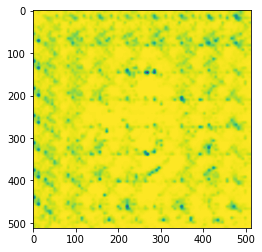

In [14]:

gen_image = new_model.predict(hog_vec)
#plt.imshow(gen_image[0, :, :, 0])
new_image =  color.rgb2gray(gen_image[0])

#print(new_image.shape)
#plt.imshow(new_image[0, :, :])
final_image = cv2.resize(new_image, (512,512))
plt.imshow(final_image[:,:])
#print(type(gen_image))
print(final_image.shape)

In [15]:
#So currently input and out put images are differing hugely

(2048,)
<class 'numpy.ndarray'>


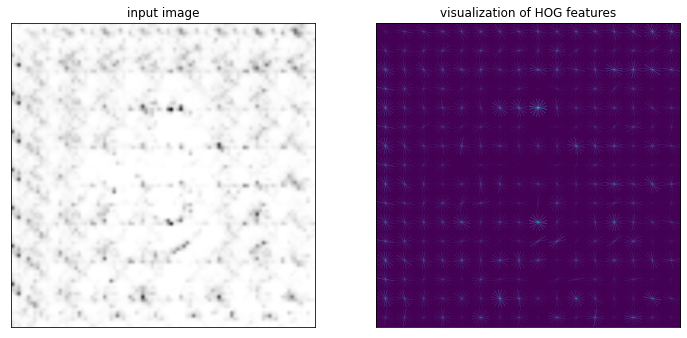

In [16]:
hog_vec2, hog_vis2 = feature.hog(final_image, orientations=8, pixels_per_cell=(32, 32),
                    cells_per_block=(1, 1), visualize=True)
fig2, ax2 = plt.subplots(1, 2, figsize=(12, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
ax2[0].imshow(final_image, cmap='gray')
ax2[0].set_title('input image')

ax2[1].imshow(hog_vis2)
ax2[1].set_title('visualization of HOG features')
print(hog_vec2.shape)
print(type(hog_vec2))

In [17]:
def calculate_similarity(hog_vec, hog_vec2):

  val = np.dot(hog_vec, hog_vec2)
  vec_norm = np.linalg.norm(hog_vec)
  vec_norm2 = np.linalg.norm(hog_vec2)
  print(val)
  print(vec_norm)
  print(vec_norm2)
  result = val / (vec_norm*vec_norm2)
  print(result)
  return result

In [18]:
calculate_similarity(hog_vec, hog_vec2)

[234.54190421]
15.620499348438932
15.999999997371956
[0.93843793]


array([0.93843793])

In [19]:
import math
def calculate_euclid(hog_vec, hog_vec2):
  value = hog_vec[0]-hog_vec2[0]
  value  = np.linalg.norm(value)
 # value = math.sqrt(value)
  return pow(value,2)
calculate_euclid(hog_vec, hog_vec2)

29.120809710378122

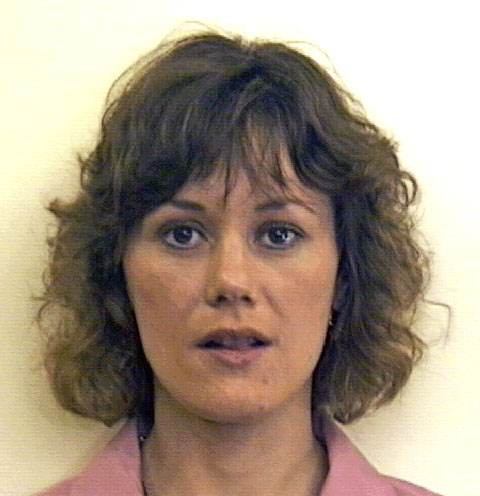

(496, 480)
(512, 512)
(2048,)


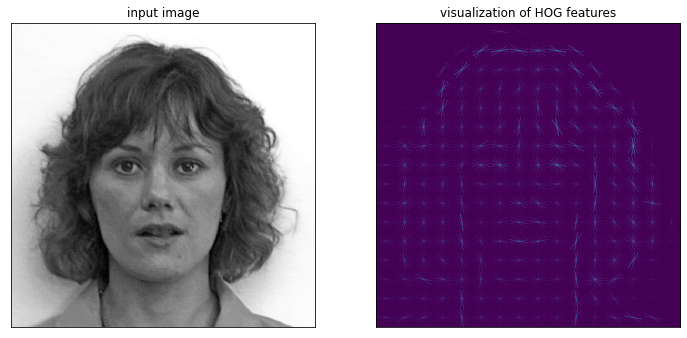

In [20]:
from google.colab.patches import cv2_imshow
new_image_path = '/content/data/MyDrive/faces/alison3.jpg'
image4 = cv2.imread(new_image_path)
cv2_imshow(image4)
image4 = color.rgb2gray(image4)
print(image4.shape)
image4 = cv2.resize(image4, (512, 512))
print(image4.shape)
hog_vec4, hog_vis4 = feature.hog(image4, orientations=8, pixels_per_cell=(32, 32),
                    cells_per_block=(1, 1), visualize=True)

fig4, ax4= plt.subplots(1, 2, figsize=(12, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
ax4[0].imshow(image4, cmap='gray')
ax4[0].set_title('input image')

ax4[1].imshow(hog_vis4)
ax4[1].set_title('visualization of HOG features');
print(hog_vec4.shape)

In [21]:
calculate_euclid(hog_vec, hog_vec4)

125.21166094063163

(512, 512)


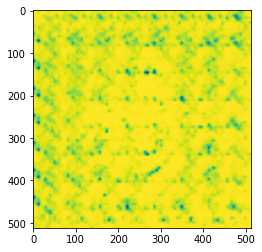

In [22]:
hog_vec4 = hog_vec4.reshape(-1, 2048)
gen_image = new_model.predict(hog_vec4)
#plt.imshow(gen_image[0, :, :, 0])
new_image =  color.rgb2gray(gen_image[0])

#print(new_image.shape)
#plt.imshow(new_image[0, :, :])
final_image = cv2.resize(new_image, (512,512))
plt.imshow(final_image[:,:])
#print(type(gen_image))
print(final_image.shape)

In [23]:
#VGG16 Architecture for training

In [9]:
from keras.preprocessing.image import ImageDataGenerator


In [10]:
data_path = '/content/data/MyDrive/faces'
def get_files_from_folder(path):
  files = os.listdir(path)
  return np.asarray(files)
files = get_files_from_folder(data_path)

In [11]:
np.random.shuffle(files)

In [12]:
test_ratio = 0.2
train_FileNames, test_FileNames = np.split(np.array(files),
                                                      [int(len(files)* (1 - test_ratio))])

train_FileNames = [data_path+'/'+ name for name in train_FileNames.tolist()]
test_FileNames = [data_path+'/' + name for name in test_FileNames.tolist()]

# for name in train_FileNames:
#   shutil.copy(name, rootdir +'/train/' + i)

# for name in test_FileNames:
#   shutil.copy(name, rootdir +'/test/' + i)
print(train_FileNames)
print(len(test_FileNames))

['/content/data/MyDrive/faces/jim9.jpg', '/content/data/MyDrive/faces/jenni4.jpg', '/content/data/MyDrive/faces/jenni18.jpg', '/content/data/MyDrive/faces/dlow2.jpg', '/content/data/MyDrive/faces/ian5.jpg', '/content/data/MyDrive/faces/louise4.jpg', '/content/data/MyDrive/faces/kirsty14.jpg', '/content/data/MyDrive/faces/paol1.jpg', '/content/data/MyDrive/faces/barry2.jpg', '/content/data/MyDrive/faces/tock1.jpg', '/content/data/MyDrive/faces/barry14.jpg', '/content/data/MyDrive/faces/peter13.jpg', '/content/data/MyDrive/faces/kirsty2.jpg', '/content/data/MyDrive/faces/hin17.jpg', '/content/data/MyDrive/faces/chris3.jpg', '/content/data/MyDrive/faces/dpearson5.jpg', '/content/data/MyDrive/faces/pat6.jpg', '/content/data/MyDrive/faces/lisa2.jpg', '/content/data/MyDrive/faces/david16.jpg', '/content/data/MyDrive/faces/dhands!45.jpg', '/content/data/MyDrive/faces/kirsty16.jpg', '/content/data/MyDrive/faces/david4.jpg', '/content/data/MyDrive/faces/miranda4.jpg', '/content/data/MyDrive/fac

In [13]:
# we have a test set now
row_list = []
for image in train_FileNames:
  final_img = cv2.imread(image)
  final_img = color.rgb2gray(final_img)
  final_img = cv2.resize(final_img, (512, 512))
  hog_vec, hog_vis = feature.hog(final_img, orientations=8, pixels_per_cell=(32, 32),
                    cells_per_block=(1, 1), visualize=True)
  row_list.append(hog_vec)

  



In [14]:
print(type(row_list))

<class 'list'>


In [15]:
new_list = np.array(row_list)

In [16]:
print(new_list)

[[0.24638708 0.29847841 0.41887593 ... 0.36376314 0.36376314 0.3274156 ]
 [0.49963545 0.11737104 0.24609974 ... 0.44770525 0.44770525 0.36209281]
 [0.48681062 0.2667712  0.35318493 ... 0.31913766 0.43891019 0.2046172 ]
 ...
 [0.         0.         0.         ... 0.36501587 0.36501587 0.36501587]
 [0.20736672 0.23162153 0.43079562 ... 0.54816125 0.25798904 0.18231779]
 [0.         0.         0.         ... 0.60427389 0.36116876 0.12852242]]


In [17]:
print(new_list.shape)

(549, 2048)


In [17]:
np.save('/content/data/MyDrive/new_list', new_list)

In [44]:
# data = new_model.predict(new_list)
# print(data.shape)

(549, 96, 96, 3)


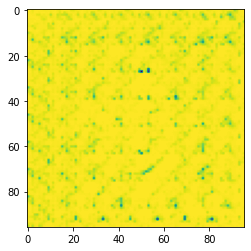

In [50]:
#plt.imshow(data[0, :, :, 0])

In [26]:
class LinearCustomRegression:

  def __init__(self, lr=0.005, n_iters = 100):
    with tf.device('/device:GPU:0'):
      self.lr = lr
      self.n_iters = n_iters
      self.weights = None
      self.bias = None
  def fit(self, X):
    with tf.device('/device:GPU:0'):
      n_samples, n_features = X.shape
      self.weights = np.zeros([n_features, n_features])
      self.bias = np.zeros(n_features)

      for i in range(self.n_iters):
        print(i)
        y_predicted = np.dot(X, self.weights) + self.bias
        img_data = new_model.predict(y_predicted)
        hog_curr=[]

        for j in range(n_samples):
          new_image_data =  color.rgb2gray(img_data[j])
          final_image_data = cv2.resize(new_image_data, (512,512))
          # generate hog feature of this image
          hog_vec_curr, hog_vis_curr = feature.hog(final_image_data, orientations=8, pixels_per_cell=(32, 32),
                    cells_per_block=(1, 1), visualize=True)
          hog_curr.append(hog_vec_curr)

        hog_curr = np.array(hog_curr)
        #hog_curr is my output
        #ground truth is X
        dw = (1/n_samples) * np.dot((X - hog_curr).T , (-2 * X))
        dbias = (1/n_samples) * np.dot(-2*np.ones((n_samples), dtype=np.float64) ,(X - hog_curr))

        self.weights -= self.lr * dw
        self.bias -= self.lr * dbias

  def predict(self, X):
    with tf.device('/device:GPU:0'):
      y_predicted = np.dot(X, self.weights)+self.bias
      return y_predicted



In [27]:
val = np.dot(-2*np.ones((1, 549)),np.ones((549, 2048)))
print(val.shape)

(1, 2048)


In [28]:
custom_model = LinearCustomRegression()
custom_model.fit(new_list)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


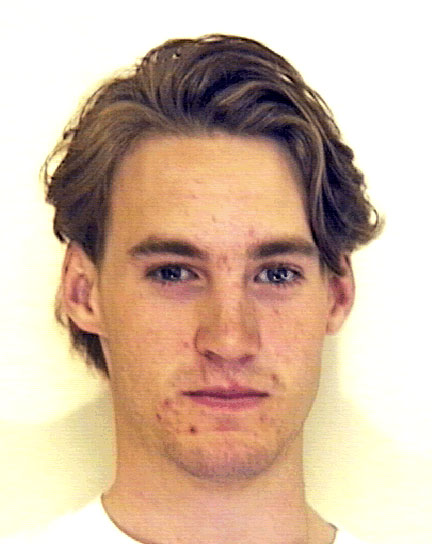

(544, 432)
(512, 512)
(2048,)


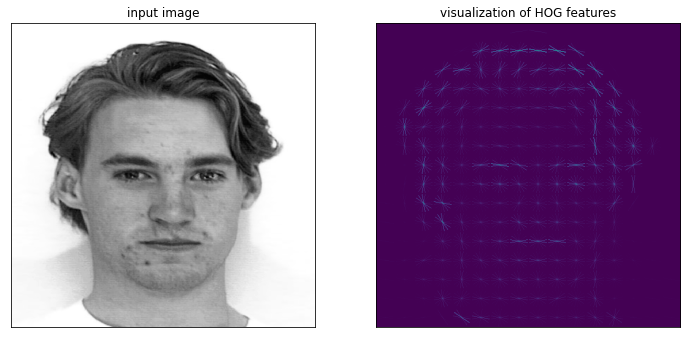

In [72]:
from google.colab.patches import cv2_imshow
new_image_path = '/content/data/MyDrive/faces/dougal_grant1.jpg'
image4 = cv2.imread(new_image_path)
cv2_imshow(image4)
image4 = color.rgb2gray(image4)
print(image4.shape)
image4 = cv2.resize(image4, (512, 512))
print(image4.shape)
hog_vec4, hog_vis4 = feature.hog(image4, orientations=8, pixels_per_cell=(32, 32),
                    cells_per_block=(1, 1), visualize=True)

fig4, ax4= plt.subplots(1, 2, figsize=(12, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
ax4[0].imshow(image4, cmap='gray')
ax4[0].set_title('input image')

ax4[1].imshow(hog_vis4)
ax4[1].set_title('visualization of HOG features');
print(hog_vec4.shape)

In [73]:
predicted_data = custom_model.predict(hog_vec4)
print(predicted_data.shape)

(2048,)


In [75]:
predicted_data = np.resize(predicted_data,(1,2048))

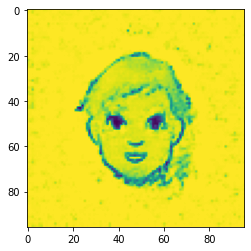

In [76]:
pred_img = new_model.predict(predicted_data)
plt.imshow(pred_img[0, :, :, 0])

In [51]:

import pickle

pickle.dump(custom_model, open('/content/data/MyDrive/final500.sav', 'wb'))

In [41]:
train_data_temp = new_model.predict(new_list)

In [42]:
print(train_data_temp.shape)

(549, 96, 96, 3)
